In [45]:
import pandas as pd
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
#Calculate the probability that a randomly selected student scored more than 80 in math.


In [3]:
students_above_80_math = df[df['math score'] > 80].shape[0]

# Calculate the total number of students
total_students = df.shape[0]

# Calculate the probability
probability = students_above_80_math / total_students

print(f"The probability that a randomly selected student scored more than 80 in math is: {probability:.4f}")

The probability that a randomly selected student scored more than 80 in math is: 0.1760


In [43]:
import pandas as pd
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


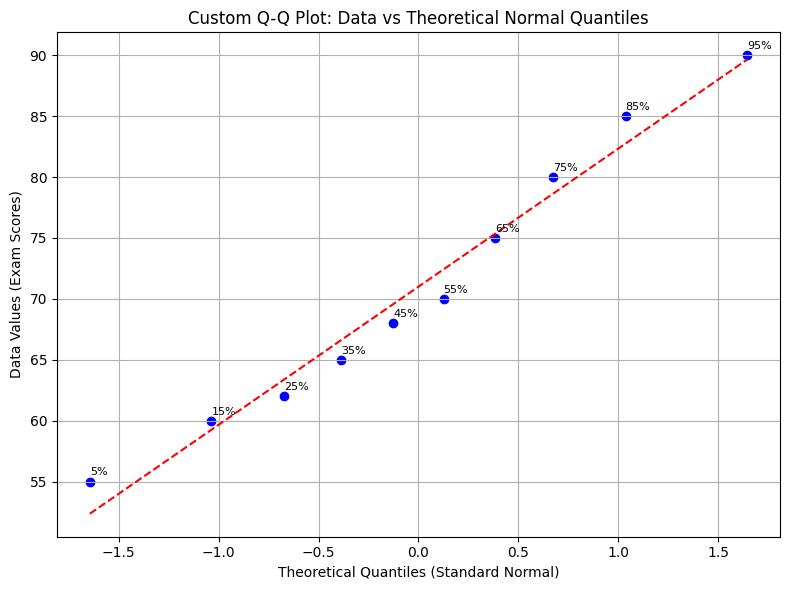

In [5]:
# Q-Q Plot Worked Example: Custom Data vs Theoretical Normal Quantiles

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# ----------------------------
# 1. Your dataset
# ----------------------------
data = np.array([55, 60, 62, 65, 68, 70, 75, 80, 85, 90])
n = len(data)

# ----------------------------
# 2. Calculate percentiles for each data point
# Formula: (i - 0.5) / n
# ----------------------------
percentiles = [(i - 0.5) / n for i in range(1, n+1)]

# ----------------------------
# 3. Calculate theoretical normal quantiles using inverse CDF (ppf)
# ----------------------------
expected_normal = [norm.ppf(p) for p in percentiles]

# ----------------------------
# 4. Plotting
# ----------------------------
plt.figure(figsize=(8,6))
plt.scatter(expected_normal, data, color='blue')
plt.title('Custom Q-Q Plot: Data vs Theoretical Normal Quantiles')
plt.xlabel('Theoretical Quantiles (Standard Normal)')
plt.ylabel('Data Values (Exam Scores)')

# Add a best fit line for reference
slope, intercept = np.polyfit(expected_normal, data, 1)
plt.plot(expected_normal, np.array(expected_normal)*slope + intercept, color='red', linestyle='--')

# Annotate each point with its percentile for teaching
for x, y, p in zip(expected_normal, data, percentiles):
    plt.text(x, y+0.5, f"{int(p*100)}%", fontsize=8)

plt.grid(True)
plt.tight_layout()
plt.show()

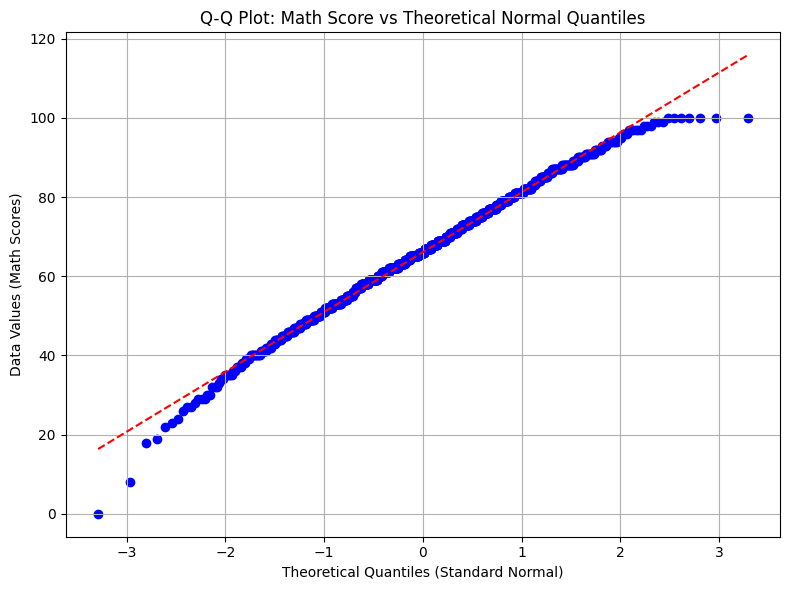

In [10]:
#draw a qq plot for math score in the dataframe df
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Get the math scores and sort them
math_scores = np.sort(df['math score'])
n = len(math_scores)

# Calculate percentiles for each data point
percentiles = [(i - 0.5) / n for i in range(1, n+1)]

# Calculate theoretical normal quantiles using inverse CDF (ppf)
expected_normal = [norm.ppf(p) for p in percentiles]

# Plotting
plt.figure(figsize=(8,6))
plt.scatter(expected_normal, math_scores, color='blue')
plt.title('Q-Q Plot: Math Score vs Theoretical Normal Quantiles')
plt.xlabel('Theoretical Quantiles (Standard Normal)')
plt.ylabel('Data Values (Math Scores)')

# Add a best fit line for reference
slope, intercept = np.polyfit(expected_normal, math_scores, 1)
plt.plot(expected_normal, np.array(expected_normal)*slope + intercept, color='red', linestyle='--')

# Annotate each point with its percentile for teaching
# Not practical for 1000 points, so I will remove this for clarity
# for x, y, p in zip(expected_normal, math_scores, percentiles):
#     plt.text(x, y+0.5, f"{int(p*100)}%", fontsize=8)

plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
import plotly.express as px
px.histogram(df,'charges')

In [15]:
px.box(df,'charges')

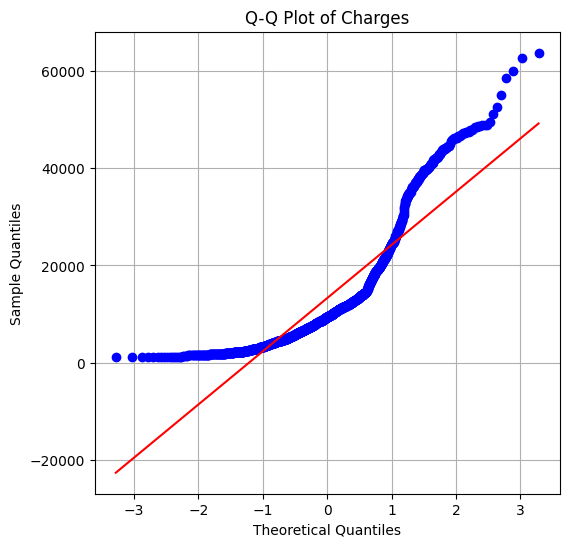

In [17]:
# 2. Q-Q Plot using Matplotlib (scipy is used for quantiles)
import scipy.stats as stats
plt.figure(figsize=(6,6))
stats.probplot(df["charges"], dist="norm", plot=plt)
plt.title("Q-Q Plot of Charges")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.show()

In [18]:
df.shape

(1338, 7)

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

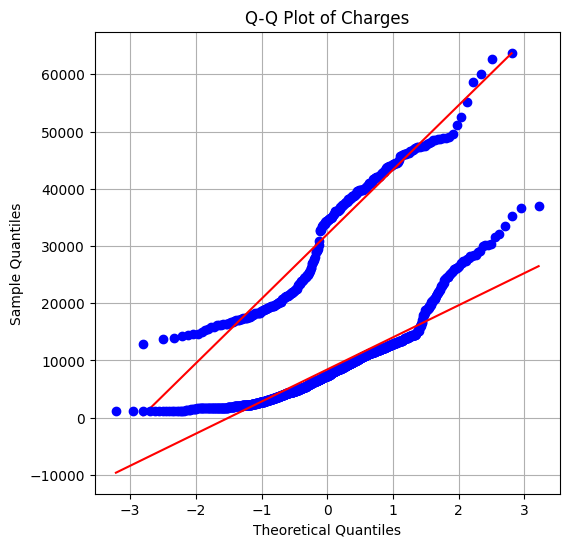

In [29]:
import scipy.stats as stats
import matplotlib.pyplot as plt # Import matplotlib

plt.figure(figsize=(6,6))
smoker = df[df['smoker'] == 'yes']
non_smoker = df[df['smoker'] == 'no']
stats.probplot(smoker['charges'], dist="norm", plot=plt) # Select 'charges' column
stats.probplot(non_smoker['charges'], dist="norm", plot=plt) # Select 'charges' column
plt.title("Q-Q Plot of Charges")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.show()

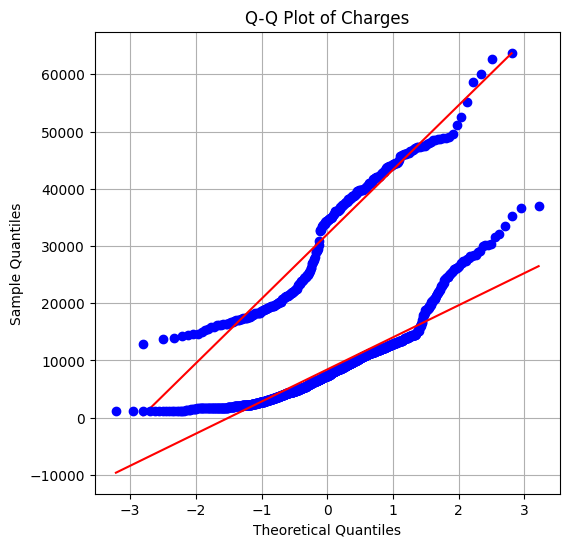

In [28]:
import scipy.stats as stats
import matplotlib.pyplot as plt # Import matplotlib

plt.figure(figsize=(6,6))
smoker = df[df['smoker'] == 'yes']
non_smoker = df[df['smoker'] == 'no']
stats.probplot(smoker['charges'], dist="norm", plot=plt) # Select 'charges' column
stats.probplot(non_smoker['charges'], dist="norm", plot=plt) # Select 'charges' column
plt.title("Q-Q Plot of Charges")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.show()

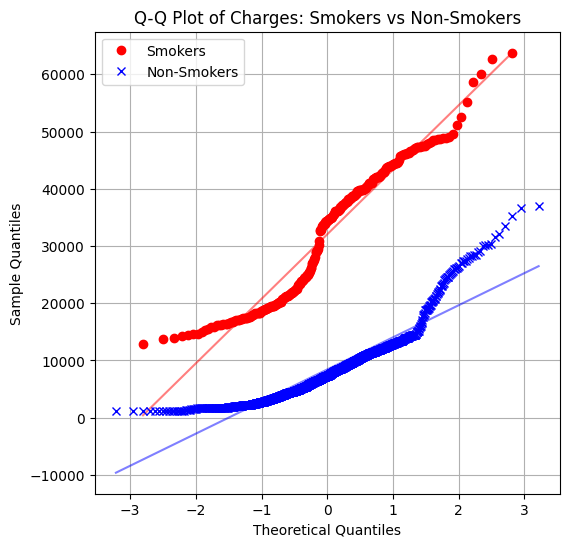

In [31]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Prepare data
smoker = df[df['smoker'] == 'yes']['charges']
non_smoker = df[df['smoker'] == 'no']['charges']

# Generate Q-Q data
smoker_qq = stats.probplot(smoker, dist="norm")
non_smoker_qq = stats.probplot(non_smoker, dist="norm")

# Create plot
plt.figure(figsize=(6,6))

# Plot smokers' Q-Q plot and line
plt.plot(smoker_qq[0][0], smoker_qq[0][1], 'o', label='Smokers', color='red')
smoker_line = smoker_qq[1][1] + smoker_qq[1][0] * smoker_qq[0][0]
plt.plot(smoker_qq[0][0], smoker_line, 'r-', alpha=0.5)

# Plot non-smokers' Q-Q plot and line
plt.plot(non_smoker_qq[0][0], non_smoker_qq[0][1], 'x', label='Non-Smokers', color='blue')
non_smoker_line = non_smoker_qq[1][1] + non_smoker_qq[1][0] * non_smoker_qq[0][0]
plt.plot(non_smoker_qq[0][0], non_smoker_line, 'b-', alpha=0.5)

# Plot formatting
plt.title("Q-Q Plot of Charges: Smokers vs Non-Smokers")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.legend()
plt.show()


In [32]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
px.scatter(df,'Annual Income (k$)','Spending Score (1-100)',color='Gender',trendline='ols')

Hypothsis Testing

In [38]:
# 1 tailed t test
from scipy import stats

# Sample delivery times (in minutes)
delivery_times = [32, 35, 30, 31, 36, 33, 29, 34, 37, 28]

# Population mean to test against
mu_0 = 30

# One-sample t-test (one-tailed test: greater than 30)
t_stat, p_value_two_tailed = stats.ttest_1samp(delivery_times, mu_0)

# For one-tailed test (greater than), divide p-value by 2
p_value_one_tailed = p_value_two_tailed / 2

# Output results
print("Sample Mean:", round(sum(delivery_times) / len(delivery_times), 2))
print("t-statistic:", round(t_stat, 3))
print("p-value (one-tailed):", round(p_value_one_tailed, 4))

# Conclusion
alpha = 0.05
if p_value_one_tailed < alpha and t_stat > 0:
    print("Conclusion: Reject H0 — average delivery time is greater than 30 minutes.")
else:
    print("Conclusion: Fail to reject H0 — not enough evidence that average is greater.")


Sample Mean: 32.5
t-statistic: 2.611
p-value (one-tailed): 0.0141
Conclusion: Reject H0 — average delivery time is greater than 30 minutes.


In [39]:
#Independent 2 tail test
from scipy import stats

# Scores from two independent groups
group_a = [75, 78, 74, 72, 80, 77, 73, 76, 79, 74]  # Traditional
group_b = [82, 85, 84, 81, 86, 83, 80, 87, 85, 84]  # Interactive

# Perform two-sample t-test (equal variances assumed)
t_stat, p_value = stats.ttest_ind(group_a, group_b, equal_var=True)

# Output results
print("Group A Mean:", round(sum(group_a)/len(group_a), 2))
print("Group B Mean:", round(sum(group_b)/len(group_b), 2))
print("t-statistic:", round(t_stat, 3))
print("p-value:", round(p_value, 4))

# Interpret result
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject H0 — There is a significant difference between the teaching methods.")
else:
    print("Conclusion: Fail to reject H0 — No significant difference detected.")


Group A Mean: 75.8
Group B Mean: 83.7
t-statistic: -7.222
p-value: 0.0
Conclusion: Reject H0 — There is a significant difference between the teaching methods.


In [40]:
#Anova

from scipy import stats

# Step 1: Create test scores for each group
group_a = [70, 72, 68, 75, 74]  # Traditional
group_b = [80, 82, 85, 79, 81]  # Online
group_c = [90, 88, 92, 91, 89]  # Workshop

# Step 2: Perform one-way ANOVA test
f_stat, p_value = stats.f_oneway(group_a, group_b, group_c)

# Step 3: Print the result
print("F-statistic:", round(f_stat, 2))
print("p-value:", round(p_value, 4))

# Step 4: Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject H0 — At least one group is different.")
else:
    print("Conclusion: Fail to reject H0 — No significant difference between groups.")

F-statistic: 77.71
p-value: 0.0
Conclusion: Reject H0 — At least one group is different.


In [42]:
#Chi Square
import numpy as np
from scipy.stats import chi2_contingency

# Observed frequency table (2x2)
# Rows = Gender (Male, Female)
# Columns = Purchase (Yes, No)

observed = np.array([
    [30, 20],  # Male: 30 Yes, 20 No
    [10, 40]   # Female: 10 Yes, 40 No
])

In [ ]:
# Shapiro-Wilk test on df

In [44]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test on the 'charges' column
shapiro_test_statistic, shapiro_p_value = shapiro(df['charges'])

# Output the results
print(f"Shapiro-Wilk Test Statistic: {shapiro_test_statistic:.4f}")
print(f"Shapiro-Wilk P-value: {shapiro_p_value:.4f}")

# Interpret the result
alpha = 0.05
if shapiro_p_value < alpha:
    print("Conclusion: Reject H0 - The 'charges' data does not appear to be normally distributed.")
else:
    print("Conclusion: Fail to reject H0 - The 'charges' data appears to be normally distributed.")

Shapiro-Wilk Test Statistic: 0.8147
Shapiro-Wilk P-value: 0.0000
Conclusion: Reject H0 - The 'charges' data does not appear to be normally distributed.


 3. One-tail t-test Question

Dataset: [Students Performance in Exams (same as above)](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)

Problem:
Test the hypothesis that mean math score is greater than 65 (use one-sample, one-tail t-test).

Steps for Students:

 Null hypothesis: mean ≤ 65
 Alternative hypothesis: mean > 65
 Conduct one-sample t-test
 Report t-statistic and p-value; conclude



In [46]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [48]:
# Null hypothesis: mean ≤ 65 Alternative hypothesis: mean > 65 Conduct one-sample t-test Report t-statistic and p-value; conclude
from scipy import stats
t_stat, p_value_two_tailed = stats.ttest_1samp(df['math score'], 65)
p_value_one_tailed = p_value_two_tailed / 2
print("Sample Mean:", round(sum(df['math score']) / len(df['math score']), 2))
print("t-statistic:", round(t_stat, 3))
print("p-value (one-tailed):", round(p_value_one_tailed, 4))
alpha = 0.05
if p_value_one_tailed < alpha and t_stat > 0:
    print("Conclusion: Reject H0 — average math score is greater than 65.")
else:
    print("Conclusion: Fail to reject H0 — not enough evidence that average is greater.")

Sample Mean: 66.09
t-statistic: 2.271
p-value (one-tailed): 0.0117
Conclusion: Reject H0 — average math score is greater than 65.


 4. Two-tail t-test Question

Dataset: [Students Performance in Exams (same as above)](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)

Problem:
Test if average math score differs between male and female students (two-sample, two-tail t-test).

Steps for Students:

 Null hypothesis: means are equal
 Alternative hypothesis: means are different
 Perform independent two-sample t-test
 Report t-statistic and p-value; conclude



In [49]:
#Null hypothesis: means are equal Alternative hypothesis: means are different Perform independent two-sample t-test Report t-statistic and p-value; conclude
t_stat, p_value = stats.ttest_ind(df[df['gender'] == 'male']['math score'], df[df['gender'] == 'female']['math score'], equal_var=True)
print("t-statistic:", round(t_stat, 3))
print("p-value:", round(p_value, 4))
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject H0 — There is a significant difference between the average math scores of male and female students.")
else:
    print("Conclusion: Fail to reject H0 — No significant difference detected.")

t-statistic: 5.383
p-value: 0.0
Conclusion: Reject H0 — There is a significant difference between the average math scores of male and female students.


In [50]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
#does size of the company affects the salary


**Hypothesis Test: Salary vs. Company Size**

*   **Null Hypothesis (H0):** The mean salary is the same across different company sizes.
*   **Alternative Hypothesis (H1):** The mean salary is different for at least one company size.

In [51]:
from scipy import stats

# Separate salaries by company size
salary_s = df[df['company_size'] == 'S']['salary_in_usd']
salary_m = df[df['company_size'] == 'M']['salary_in_usd']
salary_l = df[df['company_size'] == 'L']['salary_in_usd']

# Perform one-way ANOVA test
f_stat, p_value = stats.f_oneway(salary_s, salary_m, salary_l)

# Output results
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject H0 - There is a significant difference in average salary for at least one company size.")
else:
    print("Conclusion: Fail to reject H0 - No significant difference in average salary detected across company sizes.")

F-statistic: 11.9578
p-value: 0.0000
Conclusion: Reject H0 - There is a significant difference in average salary for at least one company size.


In [52]:
df1 = pd.read_csv('tmdb_5000_movies.csv')
df1.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
#

In [55]:
import json

# Function to extract genre names
def get_genres(genre_list):
    if isinstance(genre_list, str):
        genres = json.loads(genre_list)
        return [g['name'] for g in genres]
    return []

# Apply the function to create a list of genre names for each movie
df1['genre_names'] = df1['genres'].apply(get_genres)

# Create a new dataframe with one row per genre for each movie
df_genres = df1.explode('genre_names')

# Group by genre and calculate the mean revenue
genre_revenue = df_genres.groupby('genre_names')['revenue'].mean().sort_values(ascending=False)

# Convert revenue to millions
genre_revenue_in_millions = genre_revenue / 1_000_000

# Display the result in millions
print("Average Revenue by Genre (in millions):")
print(genre_revenue_in_millions)

Average Revenue by Genre (in millions):
genre_names
Animation          225.693025
Adventure          208.660204
Fantasy            193.354245
Family             162.345495
Science Fiction    152.456515
Action             141.213098
War                 84.155874
Thriller            81.044291
Mystery             78.300927
Comedy              71.289499
Crime               66.150662
Romance             60.002391
History             57.523562
Drama               52.116232
Music               48.455952
Western             46.245965
Horror              43.545076
Documentary          9.838888
Foreign              0.364652
TV Movie             0.000000
Name: revenue, dtype: float64


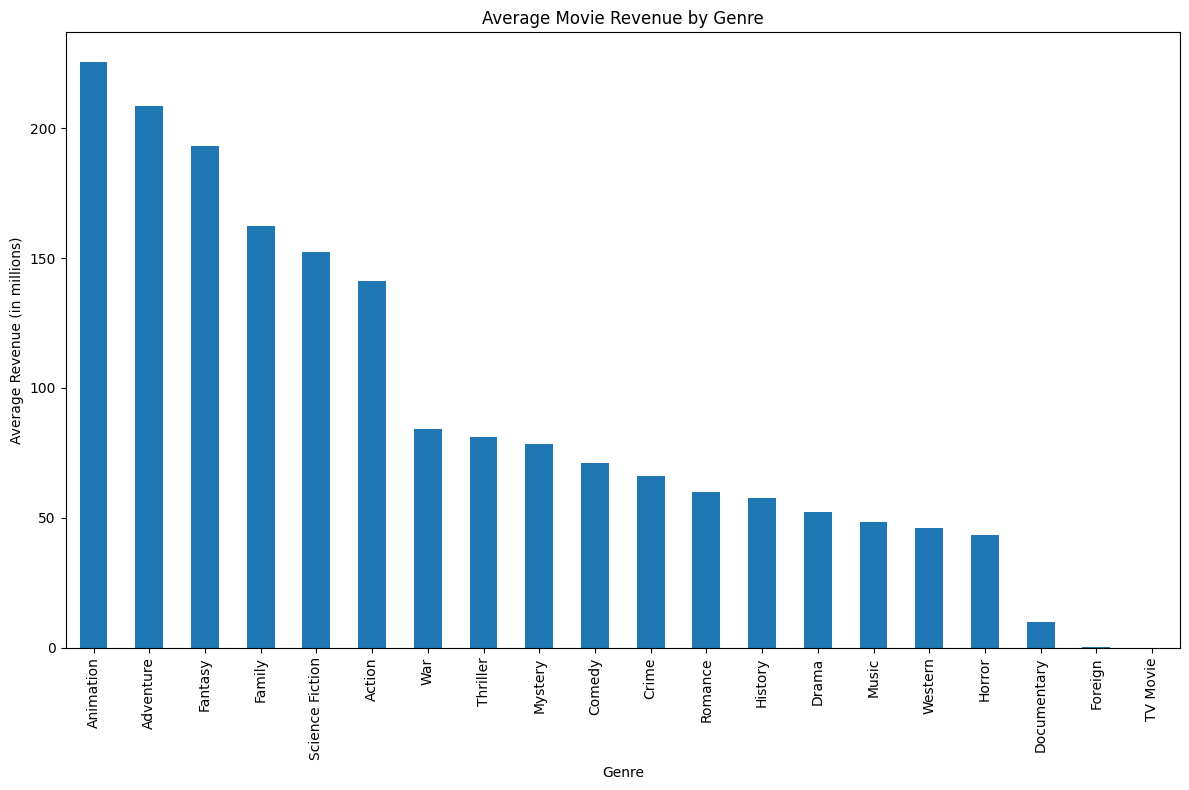

In [56]:
import matplotlib.pyplot as plt

# Create a bar chart
plt.figure(figsize=(12, 8))
genre_revenue_in_millions.plot(kind='bar')

# Add labels and title
plt.xlabel("Genre")
plt.ylabel("Average Revenue (in millions)")
plt.title("Average Movie Revenue by Genre")
plt.xticks(rotation=90) # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

**Hypothesis Test: Revenue vs. Genre**

*   **Null Hypothesis (H0):** The mean revenue is the same across all movie genres.
*   **Alternative Hypothesis (H1):** The mean revenue is different for at least one movie genre.

In [57]:
from scipy import stats

# Prepare data for ANOVA - create a list of revenue arrays for each genre
# We'll use the df_genres dataframe created earlier which has one row per genre per movie
genre_groups = [df_genres[df_genres['genre_names'] == genre]['revenue'].dropna() for genre in df_genres['genre_names'].unique()]

# Remove any empty arrays that might result from genres with no revenue data
genre_groups = [group for group in genre_groups if not group.empty]

# Perform one-way ANOVA test
f_stat, p_value = stats.f_oneway(*genre_groups)

# Output results
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject H0 - There is a significant difference in average revenue for at least one genre.")
else:
    print("Conclusion: Fail to reject H0 - No significant difference in average revenue detected across genres.")

F-statistic: 63.7100
p-value: 0.0000
Conclusion: Reject H0 - There is a significant difference in average revenue for at least one genre.


In [60]:
import plotly.express as px

# Use the df_genres dataframe which has been exploded by genre
fig = px.box(df_genres, x='genre_names', y='revenue', title='Box Plot of Movie Revenue by Genre')
fig.show()

In [61]:
# Calculate the number of genres for each movie
df1['num_genres'] = df1['genre_names'].apply(len)

# Display the distribution of the number of genres
print("Distribution of the number of genres per movie:")
print(df1['num_genres'].value_counts().sort_index())

# Display the average number of genres per movie
average_genres = df1['num_genres'].mean()
print(f"\nAverage number of genres per movie: {average_genres:.2f}")

Distribution of the number of genres per movie:
num_genres
0      28
1     900
2    1490
3    1525
4     636
5     187
6      33
7       4
Name: count, dtype: int64

Average number of genres per movie: 2.53


In [77]:
# Get the value counts of the 'genre_names' list
genre_combination_counts = df1['genre_names'].value_counts()

# Display the top 10 genre combinations
print("Top 10 Genre Combinations:")
print(genre_combination_counts)

Top 10 Genre Combinations:
genre_names
[Drama]                                                 370
[Comedy]                                                282
[Drama, Romance]                                        164
[Comedy, Romance]                                       144
[Comedy, Drama]                                         142
                                                       ... 
[Drama, Fantasy, Horror, Mystery, Romance, Thriller]      1
[Thriller, Action, Mystery]                               1
[Comedy, Drama, Family, Fantasy]                          1
[Fantasy, Comedy, Science Fiction, Romance]               1
[Action, Crime, Horror, Thriller]                         1
Name: count, Length: 1175, dtype: int64


In [63]:
import plotly.express as px

# Get the top 10 genre combinations (assuming genre_combination_counts is already calculated)
top_10_genre_combinations = genre_combination_counts.head(10).index.tolist()

# Filter the dataframe to include only movies with one of the top 10 genre combinations
df_top_genres = df1[df1['genre_names'].apply(lambda x: x in top_10_genre_combinations)]

# Create a box plot for the filtered data
fig = px.box(df_top_genres, x='genre_names', y='revenue', title='Box Plot of Movie Revenue for Top 10 Genre Combinations')
fig.show()

In [68]:
# Create a new column with genre names joined by a space
df1['genre_string'] = df1['genre_names'].apply(lambda x: ' '.join(x))

# Display the head of the dataframe to show the new column
display(df1.head())

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre_names,num_genres,genre_string
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]",4,Action Adventure Fantasy Science Fiction
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]",3,Adventure Fantasy Action
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Action, Adventure, Crime]",3,Action Adventure Crime
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Action, Crime, Drama, Thriller]",4,Action Crime Drama Thriller
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Action, Adventure, Science Fiction]",3,Action Adventure Science Fiction


In [69]:
import plotly.express as px

# Get the top 10 most frequent genre strings
top_10_genre_strings = df1['genre_string'].value_counts().head(10).index.tolist()

# Filter the dataframe to include only movies with one of the top 10 genre strings
df_top_genre_strings = df1[df1['genre_string'].isin(top_10_genre_strings)]

# Create a box plot for the filtered data
fig = px.box(df_top_genre_strings, x='genre_string', y='revenue', title='Box Plot of Movie Revenue for Top 10 Genre String Combinations')
fig.show()

In [76]:
df1['genre_string'].nu

1175